# Linear models for classification

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

In [2]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):
    import numpy
    from matplotlib.colors import ListedColormap, BoundaryNorm
    import matplotlib.patches as mpatches
    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

In [3]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):
    import numpy
    from matplotlib.colors import ListedColormap, BoundaryNorm
    import matplotlib.patches as mpatches
    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

#### Synthetic data for classification

In [4]:
X_c1, y_c1 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Fruits data

In [5]:
fruits = pd.read_table('Datasets/fruit_data_with_colors.txt')
X_fruits = fruits[['width','height']]
y_fruits = fruits['fruit_label']

<IPython.core.display.Javascript object>


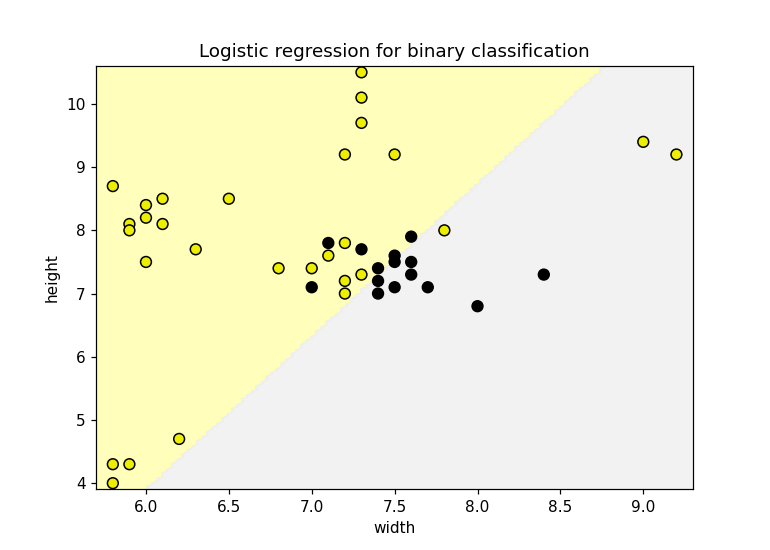

A fruit with height 6 and width 8 is classified as: an apple
A fruit with height 10 and width 7 is classified as: not an apple
Train score: 0.795
Test score: 0.733


In [6]:
from sklearn.linear_model import LogisticRegression

fig, subaxes = plt.subplots(1,1, figsize = (7,5))
y_fruit_apple = y_fruits == 1

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values, y_fruit_apple.values, random_state=0)

logreg = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(logreg, X_train, y_train, None, None, 'Logistic regression for binary classification',
                                         subaxes)

subaxes.set_xlabel('width')
subaxes.set_ylabel('height')
plt.show()

#Examples

h,w=6,8
print('A fruit with height {} and width {} is classified as: {}'.format(h,w,['not an apple', 'an apple'][logreg.predict([[w,h]])[0]]))

h,w=10,7
print('A fruit with height {} and width {} is classified as: {}'.format(h,w,['not an apple', 'an apple'][logreg.predict([[w,h]])[0]]))

#Accuracy
print('Train score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logreg.score(X_test, y_test)))

### Logistic regression with simple synthetic dataset

<IPython.core.display.Javascript object>


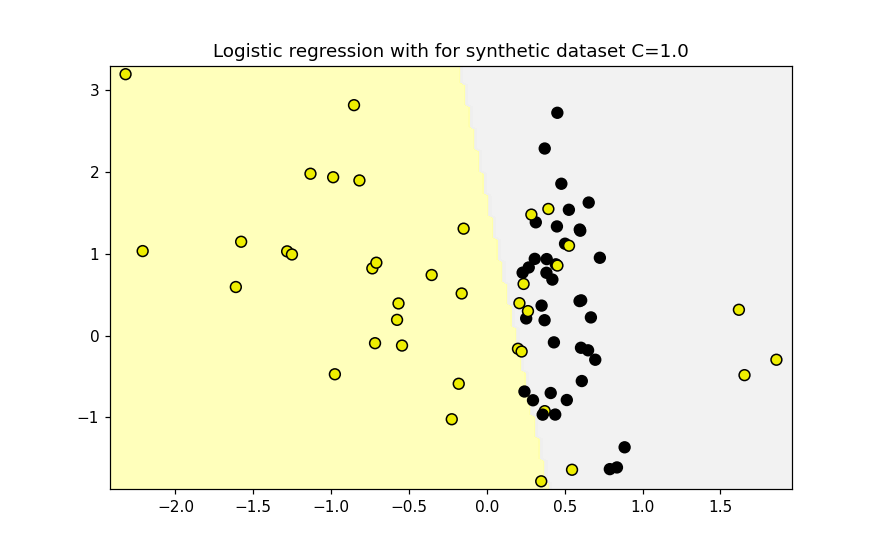

Train score 0.813
Test score 0.840


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_c1, y_c1, random_state=0)

fig, subaxes = plt.subplots(1,1, figsize=(8,5))
logreg = LogisticRegression().fit(X_train, y_train)

title = 'Logistic regression with for synthetic dataset C=1.0'
plot_class_regions_for_classifier_subplot(logreg, X_train, y_train, None, None,title, subaxes)

print('Train score {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score {:.3f}'.format(logreg.score(X_test, y_test)))

### Logistic regression regularization: C parameter

<IPython.core.display.Javascript object>


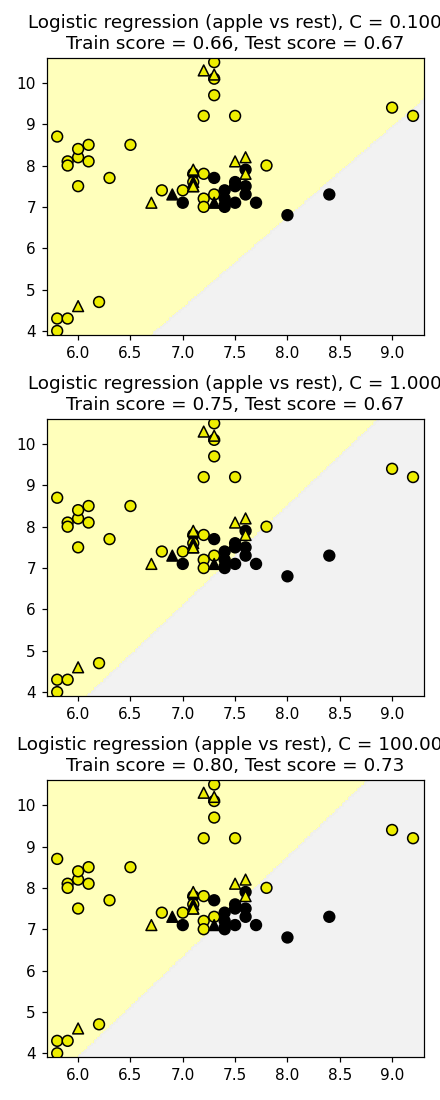

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values, y_fruit_apple.values, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

## Application to real dataset

In [9]:
from sklearn.datasets import load_breast_cancer
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

In [10]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
logreg = LogisticRegression().fit(X_cancer, y_cancer)

print('Breast Cancer')
print('Train score {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score {:.3f}'.format(logreg.score(X_test, y_test)))

Breast Cancer
Train score 0.944
Test score 0.951


# Support vector machines

<IPython.core.display.Javascript object>


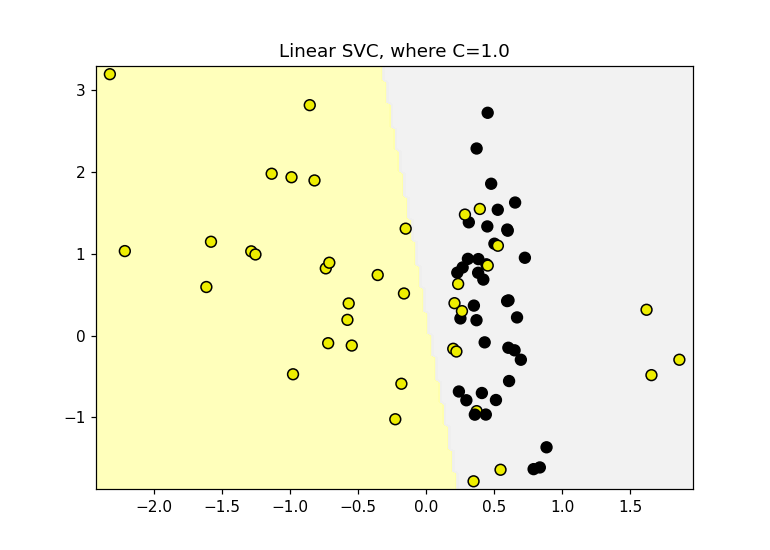

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
X_c2, y_c2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_c2, y_c2, random_state=0)
c_val=1.0
svc = SVC(kernel='linear',C=c_val).fit(X_train, y_train)

fig, subaxes = plt.subplots(1,1,figsize=(7,5))
title = 'Linear SVC, where C={}'.format(c_val)

plot_class_regions_for_classifier_subplot(svc, X_train, y_train, None, None, title, subaxes)

## Linear support vector machine: C-parameter

<IPython.core.display.Javascript object>


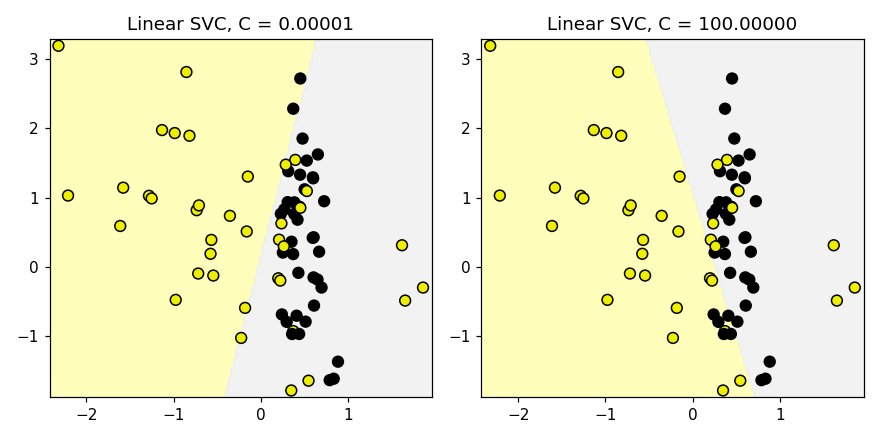

In [12]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_c2, y_c2, random_state=0)
fig, subaxes = plt.subplots(1,2, figsize=(8,4))

for c_val, subplot in zip([0.00001, 100], subaxes):
    svc = LinearSVC(C=c_val).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(c_val)
    plot_class_regions_for_classifier_subplot(svc, X_train, y_train,None, None, title, subplot)
plt.tight_layout()

## Application to real dataset

In [13]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

svc = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset:')
print('Training score: {:.2f}'.format(svc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(svc.score(X_test, y_test)))

Breast cancer dataset:
Training score: 0.93
Test score: 0.94


# Multiclass classification with linear models

### LinearSVC with 'M' classes generates 'M' one vs rest classifiers.

In [14]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits)
svc = LinearSVC(C=5, random_state=0).fit(X_train, y_train)

print('Coefficients',svc.coef_)
print('Intercepts',svc.intercept_)

Coefficients [[ 0.55352073 -0.25108763]
 [ 1.05992339 -1.34339415]
 [ 0.47626603 -0.07686769]
 [-1.62836736  1.35802791]]
Intercepts [-2.70089653  0.59251919 -3.38036011  0.24045752]


### Multiclass result on fruit data

<IPython.core.display.Javascript object>


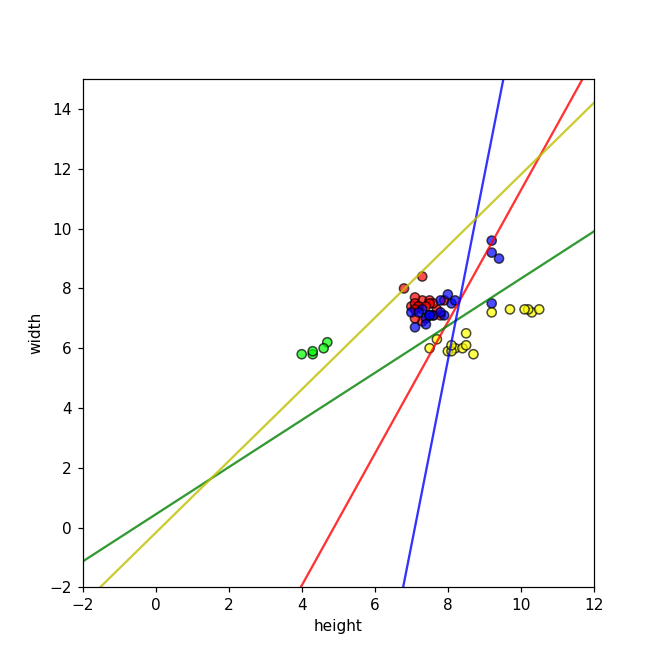

In [15]:
plt.figure(figsize=(6,6))
col=['r','g','b','y']

cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits[['height']], X_fruits[['width']], c = y_fruits.values, cmap=cmap_fruits,edgecolor = 'black', alpha=.7)
x_0_range = np.linspace(-10,15)

for w,b, color in zip(svc.coef_, svc.intercept_, ['r', 'g', 'b', 'y']):
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
# target_names_fruits = ['apple','mandarin','orange','lemon']  
# plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

# Kernelized Support Vector Machines

### Classification

In [16]:
# more difficult synthetic dataset for classification (binary) with classes that are not linearly separable
from sklearn.datasets import make_blobs
X_d2, y_d2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,cluster_std = 1.3, random_state = 4)
y_d2 = y_d2%2

In [17]:
y_d2

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

<IPython.core.display.Javascript object>


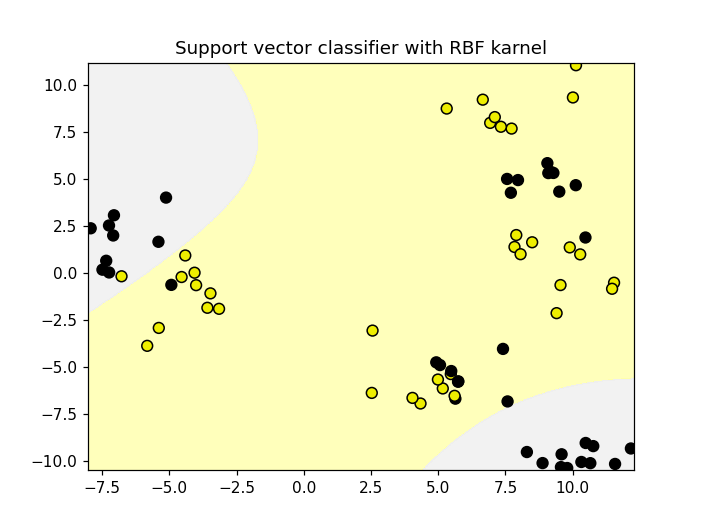

<IPython.core.display.Javascript object>


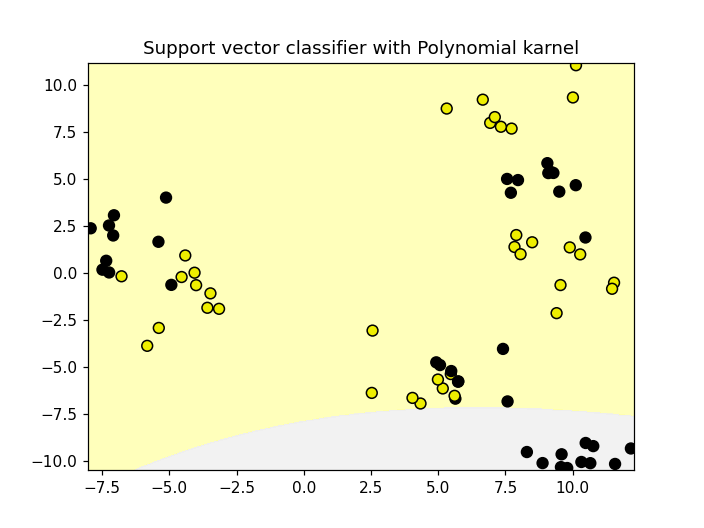

In [18]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_d2, y_d2, random_state=0)

ksvc = SVC().fit(X_train, y_train)
pksvm = SVC(kernel='poly',degree=3).fit(X_train, y_train)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train), X_train, y_train,None,None, 'Support vector classifier with RBF karnel')

plot_class_regions_for_classifier(pksvm,X_train, y_train,None,None, 'Support vector classifier with Polynomial karnel')

## Support vector machine with RBF kernel: gamma parameter

<IPython.core.display.Javascript object>


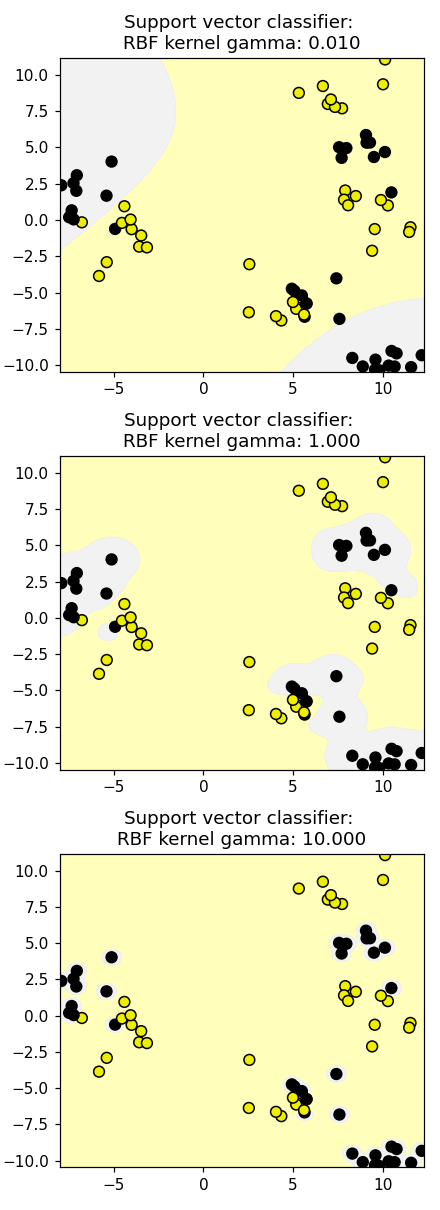

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X_d2, y_d2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for gamma, subplot in zip([0.01,1,10], subaxes):
    svm_rbf = SVC(kernel='rbf',gamma=gamma).fit(X_train, y_train)
    title = 'Support vector classifier: \nRBF kernel gamma: {:.3f}'.format(gamma)
    plot_class_regions_for_classifier_subplot(svm_rbf,X_train, y_train, None, None, title, subplot)
    
plt.tight_layout()

## Support vector machine with RBF kernel: using both C and gamma parameter

<IPython.core.display.Javascript object>


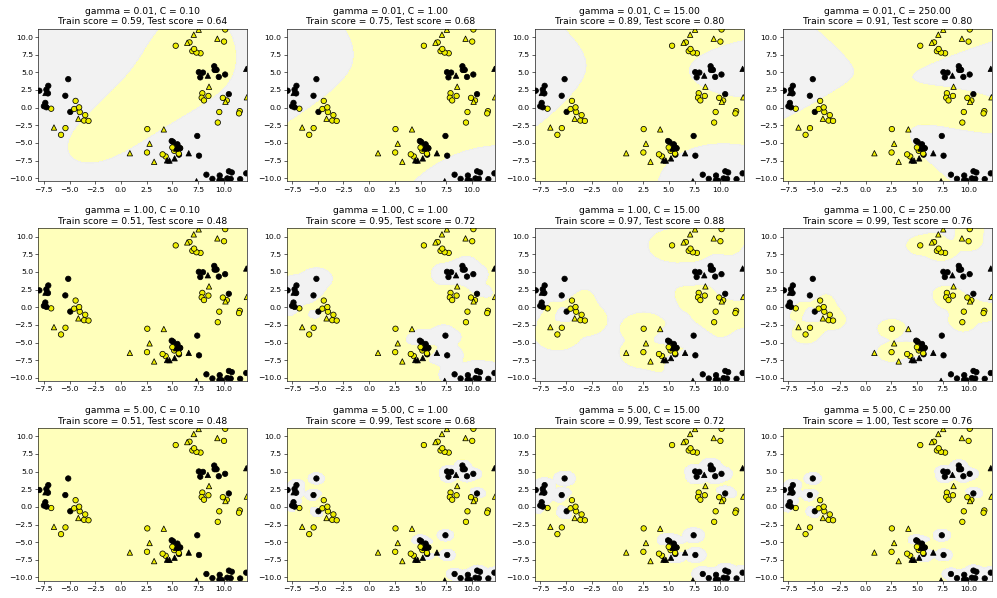

In [21]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_d2, y_d2, random_state=0)
fig, subaxes = plt.subplots(3,4, figsize=(15,10), dpi=50)

for gamma, this_axis in zip([0.01, 1, 5], subaxes):
    for c, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(gamma, c)
        clf = SVC(kernel = 'rbf', gamma = gamma,
                 C = c).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Application of SVC in real-life data : Unnormalized data

In [22]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

svc = SVC(C=10).fit(X_train, y_train)

print('Breast-cancer dataset (Unnormalized features)')
print('Training Score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test scote: {:.4f}'.format(svc.score(X_test, y_test)))

Breast-cancer dataset (Unnormalized features)
Training Score: 0.9155
Test scote: 0.9371


## Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97


# Cross-Validation